> 

# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will use 'gun_data.csv' and 'census_data.csv' files. 
> The 'gun data' file represents the usage of guns in each of the states.
> The 'census data' file represents the distribution of populations in each of the states.
Using these data, we can understand the relationship between the popluations and the gun usage changes.

> We can refer the README.md file attached to understand the meanings of each values.

### Questions:
<ul>
    <li>Question 1: How many people have been distributed in each states, in 2010 and 2016?</li>
    <li>Question 2 : How many guns were permitted in 2010 and 2016?</li>
    <li>Question 3: Can poverty make more usage of guns?</li>
    <li>Question 4: How did the gun usage changed from 2010 to 2016?</li>
    </ul>


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling & Data Cleaning


### General Properties

In [28]:
#load the data and check out the form
df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('census_data.csv')

#gun data first
df_gun.head()

,Unnamed: 0,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [29]:
df_gun.shape

(12485, 28)

In [30]:
df_gun.describe()

,Unnamed: 0,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.00000,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6242.00000,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,3604.25339,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3121.00000,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,6242.00000,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,9363.00000,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,12484.00000,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [31]:
#drop the coloumns which have less than '10' at the 75% rows 
df_gun.drop(['Unnamed: 0', 'permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_other', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other'], axis=1, inplace=True)

df_gun.describe()

In [32]:
#check out if there is a null value in the 'totals' column
df_gun['totals'].isnull().sum()

0

In [33]:
#check out if there is some duplicated data
df_gun.duplicated().sum()

0

In [34]:
#trans the object dtype to datetime
df_gun['month'] = pd.to_datetime(df_gun['month'])

In [35]:
df_gun.head()

,month,state,permit,handgun,long_gun,other,multiple,redemption_handgun,redemption_long_gun,returned_handgun,totals
0,2017-09-01,Alabama,16717.0,5734.0,6320.0,221.0,317,1378.0,1262.0,0.0,32019
1,2017-09-01,Alaska,209.0,2320.0,2930.0,219.0,160,200.0,154.0,28.0,6303
2,2017-09-01,Arizona,5069.0,11063.0,7946.0,920.0,631,1474.0,748.0,82.0,28394
3,2017-09-01,Arkansas,2935.0,4347.0,6063.0,165.0,366,1296.0,1824.0,0.0,17747
4,2017-09-01,California,57839.0,37165.0,24581.0,2984.0,0,535.0,397.0,0.0,123506


In [36]:
#Choose the data of 2016 Dec and 2010 Dec
df_gun.groupby('month')
df_gun_16 = df_gun[df_gun['month'] == '2016-12-01']
df_gun_10 = df_gun[df_gun['month'] == '2010-12-01']

In [37]:
df_gun_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 4455 to 4509
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                55 non-null     datetime64[ns]
 1   state                55 non-null     object        
 2   permit               55 non-null     float64       
 3   handgun              55 non-null     float64       
 4   long_gun             55 non-null     float64       
 5   other                55 non-null     float64       
 6   multiple             55 non-null     int64         
 7   redemption_handgun   55 non-null     float64       
 8   redemption_long_gun  55 non-null     float64       
 9   returned_handgun     0 non-null      float64       
 10  totals               55 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 5.2+ KB


In [38]:
#Put the ['state'] column to index name
df_gun_16 = df_gun_16.set_index('state')
df_gun_10 = df_gun_10.set_index('state')

In [40]:
#Add the data frame to understand the increase of the gun usage
df_gun_div = df_gun_16['totals']/df_gun_10['totals']
df_gun_inc = pd.DataFrame(df_gun_div)
df_gun_inc['totals'] = df_gun_inc['totals']*100
df_gun_inc.head()

,totals
state,
Alabama,143.331947
Alaska,124.872086
Arizona,187.482249
Arkansas,125.628647
California,365.742990


In [41]:
#drop the Nan value
df_gun_inc['totals'].dropna()

state
Alabama                 143.331947
Alaska                  124.872086
Arizona                 187.482249
Arkansas                125.628647
California              365.742990
Colorado                159.767100
Connecticut             114.659720
Delaware                263.734440
District of Columbia    262.962963
Florida                 221.659430
Georgia                 164.380824
Guam                    358.333333
Hawaii                  122.162741
Idaho                   171.748336
Illinois                199.240543
Indiana                 258.377444
Iowa                    112.437069
Kansas                  111.610900
Kentucky                210.990605
Louisiana               143.542497
Maine                   154.075809
Maryland                186.439975
Massachusetts           166.921847
Michigan                146.802111
Minnesota               227.149287
Mississippi             136.254153
Missouri                159.514568
Montana                 127.747949
Nebraska      

In [42]:
#check out the form of census
df_census.head(20)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [43]:
df_census.shape

(85, 52)

In [44]:
#As the states were on the column, flip the rows and columns
#as transpose does not supply 'inplace', rebuild a data frame.
df_new_c = df_census.set_index('Fact').transpose()

In [45]:
df_new_c.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#As we will only use the first and second columns, rename those column names
df_new_c.rename(columns = {'Population estimates, July 1, 2016,  (V2016)': 'ppl_16', 'Population estimates base, April 1, 2010,  (V2016)': 'ppl_10'}, inplace='True')

In [47]:
#replace the objecsts with commas to only numbers
df_new_c['ppl_16'] = df_new_c['ppl_16'].str.replace(",", "")
df_new_c['ppl_10'] = df_new_c['ppl_10'].str.replace(",", "")

In [48]:
df_new_c.head()

Fact,ppl_16,ppl_10,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#remove ['Fact Note'] row
df_new_c.drop(['Fact Note'], axis=0, inplace=True)
df_new_c.head()

Fact,ppl_16,ppl_10,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#change the dtype to float
df_new_c['ppl_16']= df_new_c['ppl_16'].astype(float)
df_new_c['ppl_10']=df_new_c['ppl_10'].astype(float)

In [51]:
df_new_c.rename(columns = {'Persons in poverty, percent': 'poverty'}, inplace=True)

In [52]:
df_new_c.duplicated().sum()

0

In [53]:
df_new_c.info()
###Okay, so the data for the first 2 columns are perfect###

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 85 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   ppl_16                                                                                  50 non-null     float64
 1   ppl_10                                                                                  50 non-null     float64
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object 
 3   Population, Census, April 1, 2010                                                       50 non-null     object 
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     object 
 5   Persons under 5 years, percent, April 1, 2010                      

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: How many people have been distributed in each states, in 2010 and 2016?

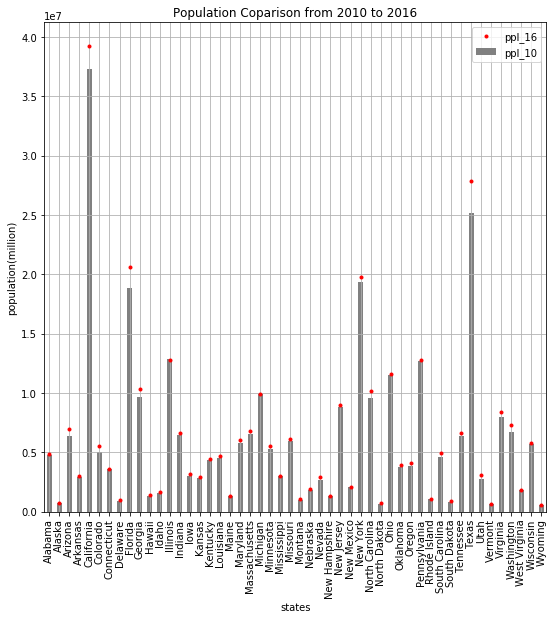

In [54]:
df_new_c['ppl_16'].plot(style='.', color='red', figsize=(9,9))
df_new_c['ppl_10'].plot(kind='bar', color='gray', figsize=(9,9))
plt.grid(True)
plt.title('Population Coparison from 2010 to 2016')
plt.xlabel('states')
plt.ylabel('population(million)')
plt.legend()

### Research Question 2 : How many guns were permitted in 2010 and 2016?

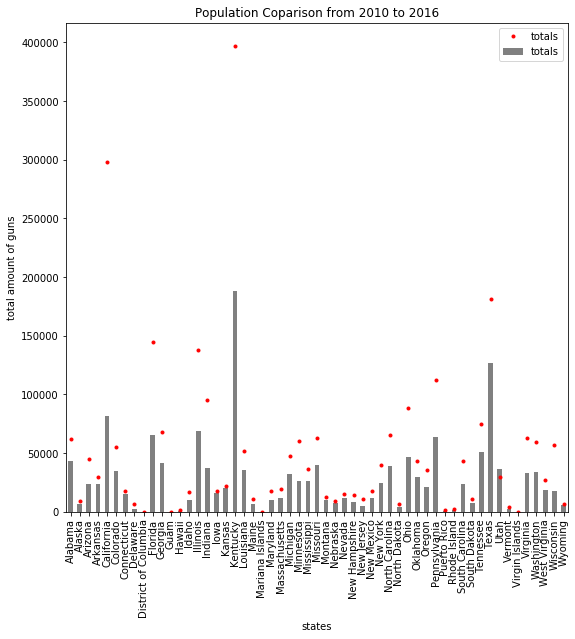

In [55]:
df_gun_16['totals'].plot(style='.', color='red', figsize=(9,9))
df_gun_10['totals'].plot(kind='bar', color='gray', figsize=(9,9))
plt.title('Population Coparison from 2010 to 2016')
plt.xlabel('states')
plt.ylabel('total amount of guns')
plt.legend()

### Research Question 3: Can poverty make more usage of guns?

In [56]:
df_new_c[df_new_c['poverty'] == df_new_c['poverty'].max()]

Fact,ppl_16,ppl_10,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alaska,741894.0,710249.0,4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Minnesota,5519952.0,5303924.0,4.10%,"5,303,925",6.40%,6.70%,23.30%,24.20%,15.10%,12.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_new_c[df_new_c['poverty'] == df_new_c['poverty'].min()]

Fact,ppl_16,ppl_10,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
North Dakota,757952.0,672591.0,0.127,672591,0.073,0.066,0.233,0.223,0.145,0.145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Research Question 4: How did the gun usage changed from 2010 to 2016?

Text(0, 0.5, 'Distribution(%)')

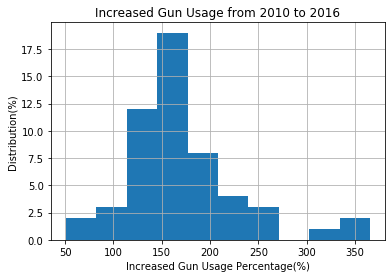

In [59]:
df_gun_inc.hist()
plt.title('Increased Gun Usage from 2010 to 2016')
plt.xlabel('Increased Gun Usage Percentage(%)')
plt.ylabel('Distribution(%)')

<a id='conclusions'></a>
## Conclusions

### Limitation
>As both of the data came from Cencus and FBI, which are the governmential institutions, most of the data did not have nulls by accident.

>However, I had to drop the useless values in the gun data, for the minor types of guns such as redemption.
 Also, I dropped the null value during the calculation about the increase of the gun usage from 2010 to 2016.

### Question 1: How many people have been distributed in each states, in 2010 and 2016?
> As we can compare the population data between 2010 and 2016, most of the populations in each states increased.

>Significantly, California's poplutation increased from 3.7 millions to almost 4 millions,
2.5 millions to 2.8 millions in Texas.

### Question 2: How many guns were permitted in 2010 and 2016?
> There were incredible growth of the usage of guns between 2010 and 2016.

> Especially, California and Kentukey was in massive change. Less than 100,000 to 300,000 in California, and less than 200,000 increased up to 400,000 in Kentuckey.

### Question 3: Can poverty make more usage of guns?
> When we see Alaska and Minnesota's gun usages, where have the highest poverty percentage, it is difficult to say high poverty is related to the usage of guns

> Noth Dakota, where has the lowest poverty percentage, has low usage of guns. However, as there are other states where have the small changes of gun usages, it is difficult to say poverty is related to the gun usage.

> Even California and Kentucky, where had the highest gun usage, had 14.3% and 18.5% of the poverty in 2016. It means there could be other variables that affected the increased usage of guns.

### Question4: How did the gun usage changed from 2010 to 2016?
> The 'Increased Gun Usage from 2010 to 2016' graph represents that the gun usage has ben increased dramatically between 2010 and 2016.

>As we can see, the distribution is right skewed, most of the values locates between 150% to 200%. Cosidering the general consumption of guns, such increase in 6 years means there could be some significant reasons to possess guns in general.